In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import os
import cv2

from satprod.data_handlers.video import SatVid
from satprod.data_handlers.img_data import SatImgDataset, SatImg

def scale(obj):
    return (obj - np.min(obj))/(np.max(obj)-np.min(obj))

In [407]:
t1 = datetime(2019, 5, 22, 14)
t2 = datetime(2019, 6, 9, 20)
print(t2-t1)

18 days, 6:00:00


In [408]:
18*24+6

438

In [271]:
root = '..'
data = SatImgDataset(root)

In [385]:
startdate = datetime(2018,6,29,12)
img = data[data.getDateIdx(startdate)].img

In [404]:
#img = cv2.imread('image.jpg')
def simplify_img(img: SatImg):
    blur = cv2.GaussianBlur(img.img, (15, 15), 2)

    white = [255,255,255]
    black = [0,0,0]
    darkgray = [90,90,90]
    gray = [120,120,120]

    lower = np.array(darkgray)
    upper = np.array(white)
    mask = cv2.inRange(blur, lower, upper)
    masked_img = cv2.bitwise_and(img.img, img.img, mask=mask)
    #cv2.imshow('', masked_img)
    #cv2.waitKey()

    height, width, channels = masked_img.shape

    for x in range(0,width):
        for y in range(0,height):
            channels_xy = masked_img[y,x]
            if all(channels_xy > gray):
                masked_img[y,x] = white
            else:
                if all(channels_xy > black):
                    masked_img[y,x] = gray
    return SatImg(masked_img, img.date)

In [405]:
masked_img = simplify_img(img)

In [406]:
startdate = datetime(2018,6,28,6)

imgs = []
for i in range(12):
    img = data[data.getDateIdx(startdate)+i]
    masked_img = simplify_img(img)
    
    imgs.append(masked_img)#.resize(scale_percent))

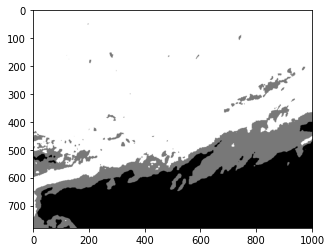

In [398]:
plt.imshow(imgs[0].img)

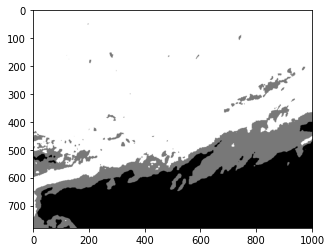

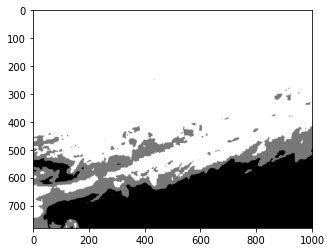

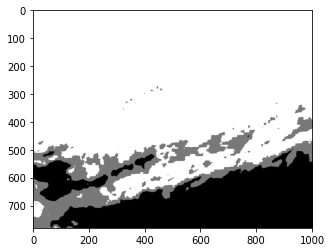

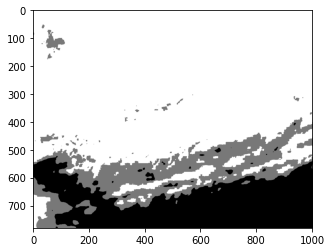

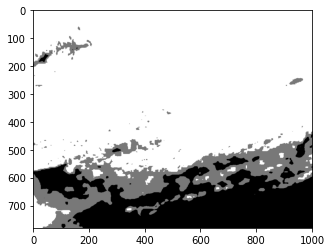

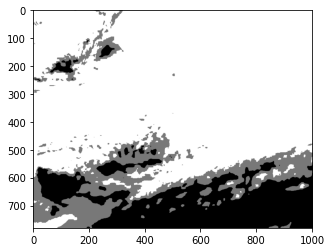

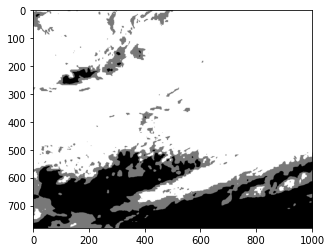

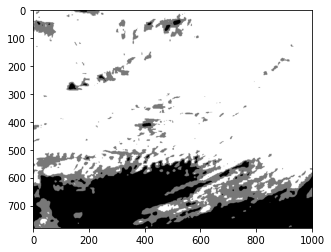

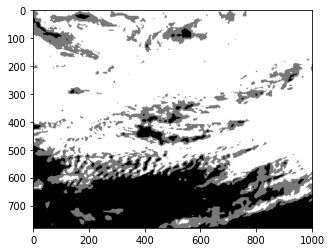

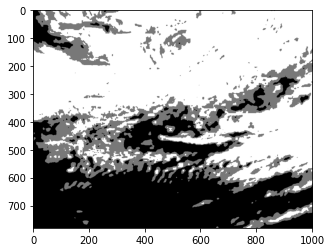

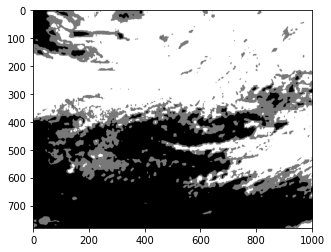

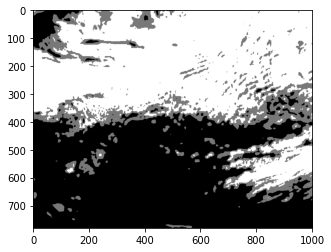

In [399]:
for i in range(12):
    imgs[i].display()

In [400]:
img_array=[]
for image in imgs:
    img_array.append(image.img)

In [401]:
img_array[0].shape

(780, 1001, 3)

In [402]:
height, width, _ = img_array[0].shape
size = (width,height)

In [403]:
out = cv2.VideoWriter('test.avi', cv2.VideoWriter_fourcc(*'DIVX'), 5, size)
c = 0
for img_obj in img_array:
    print(c)
    c += 1
    out.write(img_obj)
out.release()

0
1
2
3
4
5
6
7
8
9
10
11
